# OpenAI APIs for conversation state

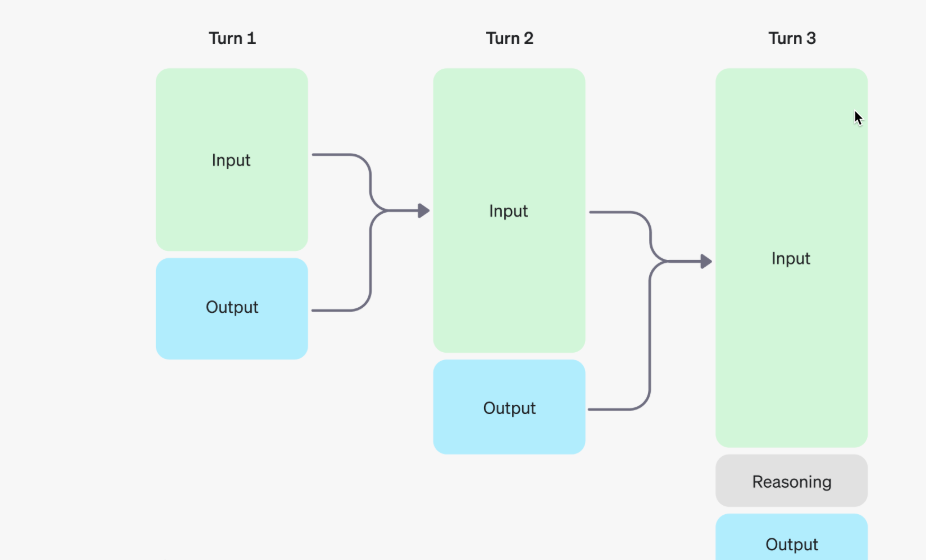

Install or update the OpenAI Python library first

In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install openai
!pip install gradio

# Clean up the notebook
clean_notebook()

Notebook cleaned.


In [3]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

In [ ]:
import os
from openai import OpenAI


openai_client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
model_name = "gpt-4.1"    


## Conversation state

Let's do a basic chat API call to learn about the chat format:

In [5]:

# Generate the completion
response = openai_client.chat.completions.create(
    model=model_name,
    messages=[
        {"role": "system", "content": "You are an AI research assistant. You use a tone that is technical and scientific."},
        {"role": "user", "content": "Hello, who are you?"},
        {"role": "assistant", "content": "Greetings! I am an AI research assistant. How can I help you today?"},
        {"role": "user", "content": "Can you tell me about the creation of black holes?"}
    ],
    temperature=0.8,
)

Let's print the response:

In [6]:
import IPython
import sys
# pretty format the response

IPython.display.Markdown(response.choices[0].message.content)

Certainly. Black holes are astrophysical objects with gravitational fields so intense that not even light can escape from them. Their creation is primarily understood through the lens of general relativity and stellar evolution. Here’s an overview of the main formation pathways:

**1. Stellar Collapse (Stellar-Mass Black Holes):**

- **Massive Star Death:** Most black holes form from the gravitational collapse of massive stars (initial masses >8 solar masses) at the end of their life cycles.
- **Supernova:** After exhausting nuclear fuel, the core can no longer support itself against gravity. If the remnant core mass exceeds the Tolman–Oppenheimer–Volkoff limit (about 2–3 solar masses), electron and neutron degeneracy pressures are insufficient to halt collapse, leading to a black hole.
- **Types of Remnants:** Less massive cores become neutron stars or white dwarfs; only sufficiently massive remnants become black holes.

**2. Direct Collapse (Very Massive Black Holes):**

- **Early Universe:** In regions of low metallicity and minimal cooling, very massive primordial gas clouds can undergo direct collapse into black holes (sometimes called direct-collapse black holes).
- **Supermassive Black Holes Seeds:** Such mechanisms are hypothesized to explain the presence of supermassive black holes (>10⁶ solar masses) at high redshifts, soon after the Big Bang.

**3. Mergers:**

- **Black Hole Mergers:** Two or more black holes can merge via gravitational radiation emission, forming a single, more massive black hole. This process is now observed via gravitational wave detectors (e.g., LIGO, Virgo).
- **Stellar and Intermediate Mass:** Mergers can also build up intermediate-mass black holes (100–10⁵ solar masses), though their formation pathways remain an area of active research.

**4. Accretion-Induced Collapse:**

- **Binary Evolution:** In a binary system, a neutron star or white dwarf can accrete material from a companion star. If the object’s mass exceeds certain limits, it may collapse into a black hole.

**Key Concepts:**

- **Event Horizon:** The boundary beyond which nothing can escape, defined by the Schwarzschild radius for non-rotating black holes.
- **Singularity:** The central region of infinite density, as described in classical general relativity (though quantum gravity effects may modify this picture).
- **Observational Evidence:** Black holes are detected via their gravitational effects on nearby matter, accretion disks, relativistic jets, and, more recently, gravitational waves.

If you would like more detail on any specific formation scenario or the current research frontiers, feel free to specify!

# Chat with History

In [7]:
import os
from openai import OpenAI


openai_client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
model_name = "gpt-4.1"    

In [8]:
# Import the OpenAI client library
from openai import OpenAI


def get_chat_completion(messages):
        response = openai_client.chat.completions.create(
            model=model_name, # You can choose other models like "gpt-4"
            messages=messages
        )
        assistant_reply = response.choices[0].message.content
        return assistant_reply
   

# Round 1

In [9]:

# Initialize the conversation history
conversation_history = []

conversation_history

[]

### Add a user message to the conversation history

In [10]:

# First round of conversation
user_message_1 = {"role": "user", "content": "What's the highest mountain in the world?"}
conversation_history.append(user_message_1)

conversation_history

[{'role': 'user', 'content': "What's the highest mountain in the world?"}]

### Compute assistant response by calling the chat API



In [11]:


assistant_response_1 = get_chat_completion(conversation_history)
print(f"Assistant: {assistant_response_1}")



Assistant: The highest mountain in the world is **Mount Everest**, which stands at **8,848.86 meters** (29,031.7 feet) above sea level. It is located in the Himalayas, on the border between Nepal and the Tibet Autonomous Region of China.


In [12]:

# Add the assistant's response to the conversation history
conversation_history.append({"role": "assistant", "content": assistant_response_1})

conversation_history

[{'role': 'user', 'content': "What's the highest mountain in the world?"},
 {'role': 'assistant',
  'content': 'The highest mountain in the world is **Mount Everest**, which stands at **8,848.86 meters** (29,031.7 feet) above sea level. It is located in the Himalayas, on the border between Nepal and the Tibet Autonomous Region of China.'}]

# Round 2

In [13]:

# Second round of conversation
user_message_2 = {"role": "user", "content": "What is the second?"}
conversation_history.append(user_message_2)

conversation_history

[{'role': 'user', 'content': "What's the highest mountain in the world?"},
 {'role': 'assistant',
  'content': 'The highest mountain in the world is **Mount Everest**, which stands at **8,848.86 meters** (29,031.7 feet) above sea level. It is located in the Himalayas, on the border between Nepal and the Tibet Autonomous Region of China.'},
 {'role': 'user', 'content': 'What is the second?'}]

In [14]:

assistant_response_2 = get_chat_completion(conversation_history)
print(f"Assistant: {assistant_response_2}")

Assistant: The **second highest mountain in the world** is **K2** (also known as Mount Godwin-Austen or Chhogori). It stands at **8,611 meters** (28,251 feet) above sea level and is located on the China–Pakistan border in the Karakoram Range.


In [15]:


# Add the assistant's response to the conversation history
conversation_history.append({"role": "assistant", "content": assistant_response_2})
conversation_history

[{'role': 'user', 'content': "What's the highest mountain in the world?"},
 {'role': 'assistant',
  'content': 'The highest mountain in the world is **Mount Everest**, which stands at **8,848.86 meters** (29,031.7 feet) above sea level. It is located in the Himalayas, on the border between Nepal and the Tibet Autonomous Region of China.'},
 {'role': 'user', 'content': 'What is the second?'},
 {'role': 'assistant',
  'content': 'The **second highest mountain in the world** is **K2** (also known as Mount Godwin-Austen or Chhogori). It stands at **8,611 meters** (28,251 feet) above sea level and is located on the China–Pakistan border in the Karakoram Range.'}]

# Round 3

In [16]:

# You can continue adding more rounds
user_message_3 = {"role": "user", "content": "And how tall is it?"}
conversation_history.append(user_message_3)

conversation_history

[{'role': 'user', 'content': "What's the highest mountain in the world?"},
 {'role': 'assistant',
  'content': 'The highest mountain in the world is **Mount Everest**, which stands at **8,848.86 meters** (29,031.7 feet) above sea level. It is located in the Himalayas, on the border between Nepal and the Tibet Autonomous Region of China.'},
 {'role': 'user', 'content': 'What is the second?'},
 {'role': 'assistant',
  'content': 'The **second highest mountain in the world** is **K2** (also known as Mount Godwin-Austen or Chhogori). It stands at **8,611 meters** (28,251 feet) above sea level and is located on the China–Pakistan border in the Karakoram Range.'},
 {'role': 'user', 'content': 'And how tall is it?'}]

In [17]:


assistant_response_3 = get_chat_completion(conversation_history)
print(f"Assistant: {assistant_response_3}")

# Add the assistant's response to the conversation history
conversation_history.append({"role": "assistant", "content": assistant_response_3})

conversation_history

Assistant: **K2** is **8,611 meters** tall, which is approximately **28,251 feet** above sea level.


[{'role': 'user', 'content': "What's the highest mountain in the world?"},
 {'role': 'assistant',
  'content': 'The highest mountain in the world is **Mount Everest**, which stands at **8,848.86 meters** (29,031.7 feet) above sea level. It is located in the Himalayas, on the border between Nepal and the Tibet Autonomous Region of China.'},
 {'role': 'user', 'content': 'What is the second?'},
 {'role': 'assistant',
  'content': 'The **second highest mountain in the world** is **K2** (also known as Mount Godwin-Austen or Chhogori). It stands at **8,611 meters** (28,251 feet) above sea level and is located on the China–Pakistan border in the Karakoram Range.'},
 {'role': 'user', 'content': 'And how tall is it?'},
 {'role': 'assistant',
  'content': '**K2** is **8,611 meters** tall, which is approximately **28,251 feet** above sea level.'}]

# Show all conversation history

In [18]:

print("\n--- Full Conversation History ---")
for message in conversation_history:
    print(f"{message['role'].capitalize()}: {message['content']}")




--- Full Conversation History ---
User: What's the highest mountain in the world?
Assistant: The highest mountain in the world is **Mount Everest**, which stands at **8,848.86 meters** (29,031.7 feet) above sea level. It is located in the Himalayas, on the border between Nepal and the Tibet Autonomous Region of China.
User: What is the second?
Assistant: The **second highest mountain in the world** is **K2** (also known as Mount Godwin-Austen or Chhogori). It stands at **8,611 meters** (28,251 feet) above sea level and is located on the China–Pakistan border in the Karakoram Range.
User: And how tall is it?
Assistant: **K2** is **8,611 meters** tall, which is approximately **28,251 feet** above sea level.
